In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(123)

#b i - reading from the dataset
data = pd.read_csv('data.csv')
data.head()

#to create a binary label(0/1)
data['diagnosis'] = data['diagnosis'].map({'M':0,'B':1})
data.head()

,id,diagnosis,radius_mean,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,radius_worst,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst
0,842302,0,17.99,10.38,1001.0,0.11840,0.27760,0.3001,25.38,17.33,2019.0,0.1622,0.6656,0.7119
1,842517,0,20.57,17.77,1326.0,0.08474,0.07864,0.0869,24.99,23.41,1956.0,0.1238,0.1866,0.2416
2,84300903,0,19.69,21.25,1203.0,0.10960,0.15990,0.1974,23.57,25.53,1709.0,0.1444,0.4245,0.4504
3,84348301,0,11.42,20.38,386.1,0.14250,0.28390,0.2414,14.91,26.50,567.7,0.2098,0.8663,0.6869
4,84358402,0,20.29,14.34,1297.0,0.10030,0.13280,0.1980,22.54,16.67,1575.0,0.1374,0.2050,0.4000


In [64]:
#to identify the dependent and independent parameters
X = data.iloc[:,2:].values
Y = data.iloc[:,1].values

#for splitting into train and test data
y_act = Y[:, np.newaxis]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y_act)
print(X)

[[1.799e+01 1.038e+01 1.001e+03 ... 1.622e-01 6.656e-01 7.119e-01]
 [2.057e+01 1.777e+01 1.326e+03 ... 1.238e-01 1.866e-01 2.416e-01]
 [1.969e+01 2.125e+01 1.203e+03 ... 1.444e-01 4.245e-01 4.504e-01]
 ...
 [1.660e+01 2.808e+01 8.581e+02 ... 1.139e-01 3.094e-01 3.403e-01]
 [2.060e+01 2.933e+01 1.265e+03 ... 1.650e-01 8.681e-01 9.387e-01]
 [7.760e+00 2.454e+01 1.810e+02 ... 8.996e-02 6.444e-02 0.000e+00]]


In [65]:
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [66]:
#b iii
#Initialising learning rate, epochs
class SinglePerceptron(object):
    def __init__(self,learning_rate,epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs
        
#initialising weights, delta_w is the weight vector       
    def fit(self,X,y):
        self.w = np.zeros(1+X.shape[1])
        self.errors = []
        for i in range(self.epochs):
            error = 0
            for xi, output in zip(X, Y):
                delta_w = self.learning_rate * (output - self.prediction(xi))
                self.w[1:] += delta_w * xi
                self.w[0] += delta_w
                error += int(delta_w != 0.0)
            self.errors.append(error)
        return self
    
    def newinputs(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]  
#b iv - activation function
    def prediction(self, X):
        return np.where(self.newinputs(X) > 0, 1, 0)

In [67]:
percep = SinglePerceptron(0.08,100)
#b v-training the model
training_model = percep.fit(X_train,Y_train)

In [68]:
#b vi - priting the weights and the hyper parameters
print("Learning rate : ",percep.learning_rate)
print("Epochs : ",percep.epochs)
print("Weights : ","\n",percep.w)

Learning rate :  0.08
Epochs :  100
Weights :  
 [-6.0800000e+00  9.8012960e+01 -2.9638400e+01  1.8784000e+02
  5.4525200e-01  1.4504000e-01  1.0484088e-01  1.1025488e+02
  1.9933440e+02 -6.6408000e+01  1.4207800e+00 -1.6516088e+00
  7.9145800e+00]


In [69]:
#b vii - predicting the outputs of train and test data
y_ptrain = percep.prediction(X_train)
y_ptest = percep.prediction(X_test)
print(y_ptest)

print(f"Training accuracy: {100 - np.mean(np.abs(y_ptrain - Y_train)) * 100}%")
print(f"Test accuracy: {100 - np.mean(np.abs(y_ptest - Y_test)) * 100}%")

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Training accuracy: 62.91079812206573%
Test accuracy: 62.23776223776224%


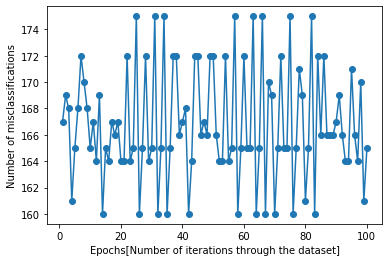

In [70]:
#Visualisation
plt.plot(range(1, len(percep.errors) + 1), percep.errors, marker='o')
plt.xlabel('Epochs[Number of iterations through the dataset]')
plt.ylabel('Number of misclassifications')
plt.show()